In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


170498071/170498071 [==============================] - 4s 0us/step


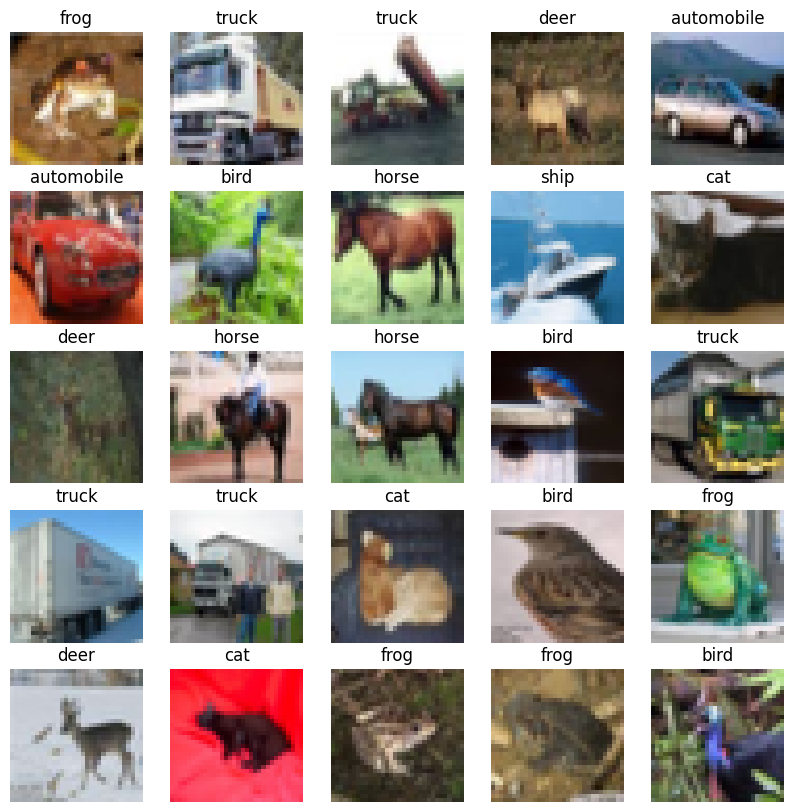

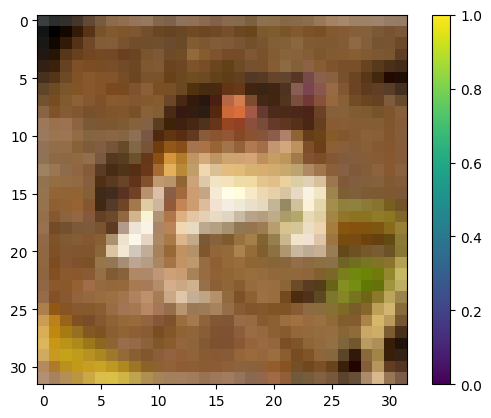

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8963 - accuracy: 0.3150
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7552 - accuracy: 0.3748
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7088 - accuracy: 0.3892
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6784 - accuracy: 0.4005
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6550 - accuracy: 0.4093
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6392 - accuracy: 0.4181
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6266 - accuracy: 0.4218
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6138 - accuracy: 0.4263
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6005 - accuracy: 0.4310
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

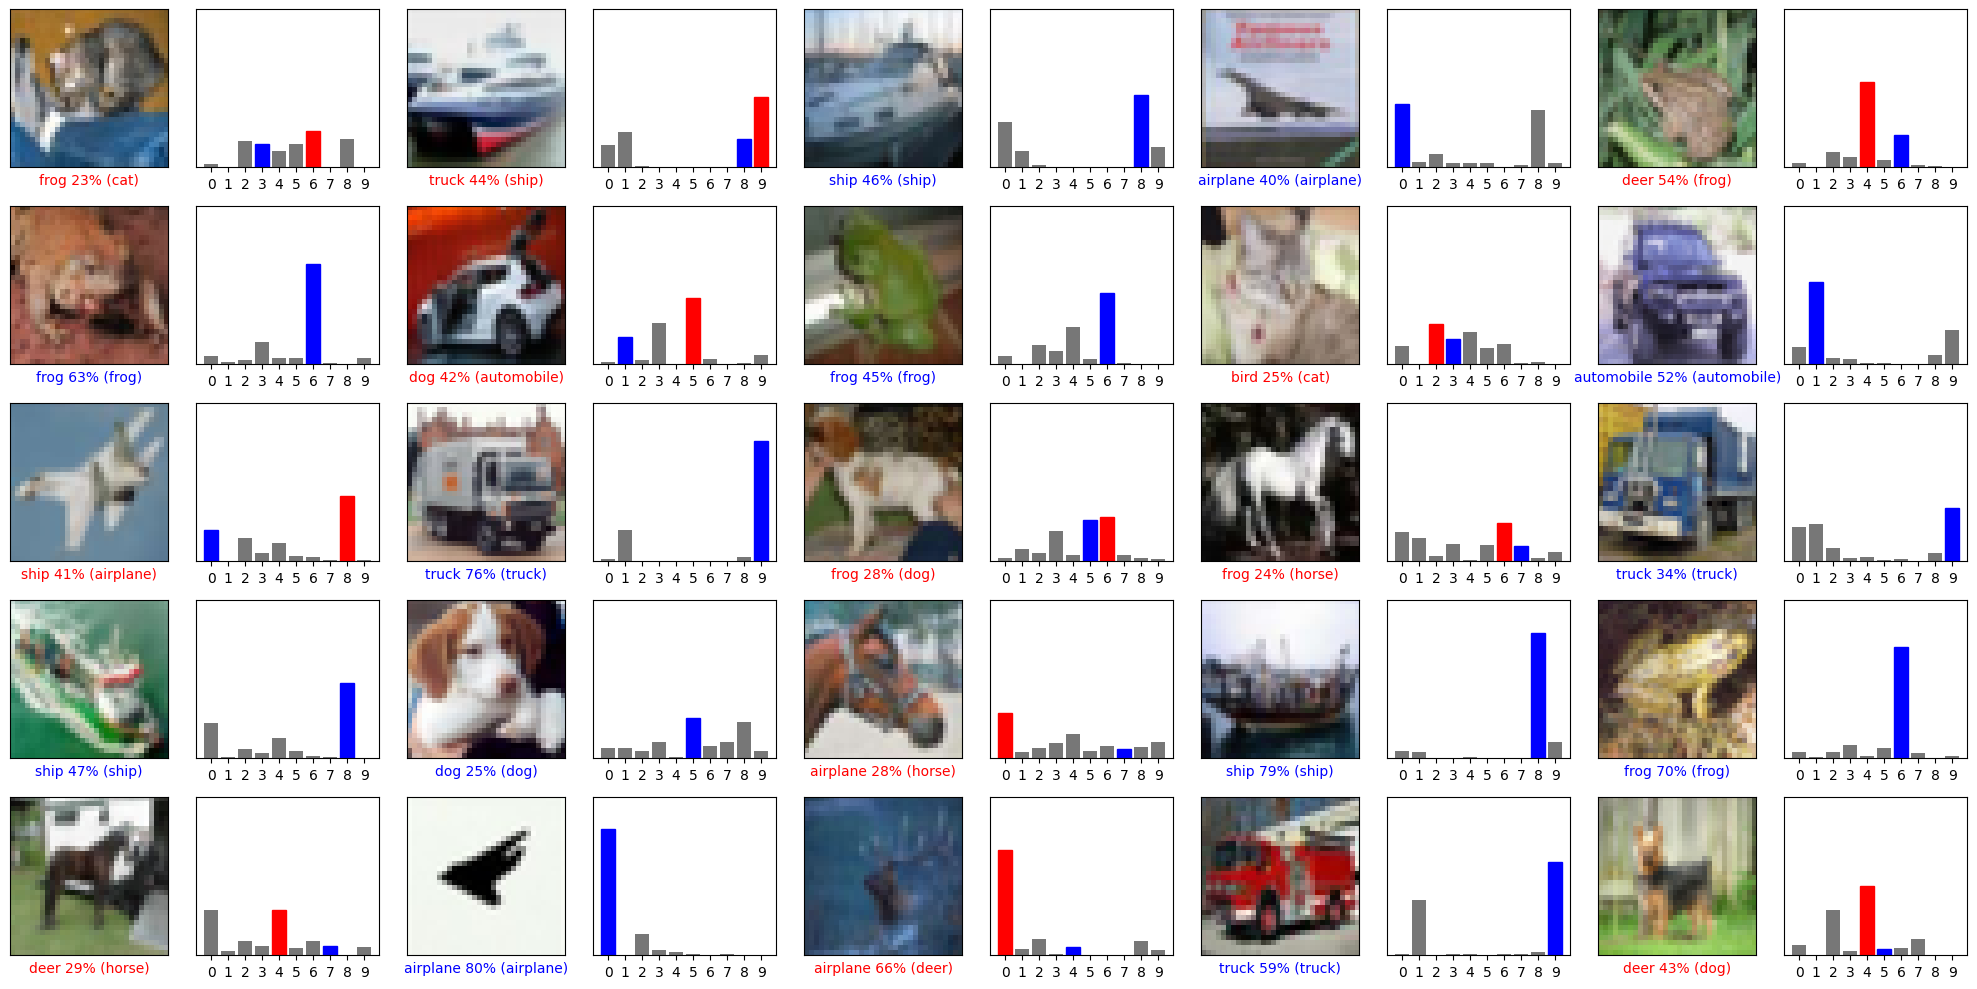

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display a few images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

# Display the first training image with colorbar and grid
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Create a neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

#Make Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

np.argmax(predictions[0])
test_labels[0]


# Define functions for plotting image and prediction array
def plot_image(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img = test_images[i]  # Get the individual image from test_images
    true_label = true_label[i][0]  # Extract scalar value from 2D array

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)
#Define plot_value_array
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]  # Extract scalar value from 2D array
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



# Display multiple images with predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

